Lending Club Case Study : Loan DataSet 

By 
1. Vaishnavi Kanagaraj 
2. harish Ragav

Problem Statement 


EDA - Explanatory dat analysis 



EDA analyse 

Starting our analysis 

doing the basic declarations


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')


Reading the file 

In [5]:
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)
loan.shape

(39717, 111)

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Step 1: Data Cleaning 

Missing values per column expressed as % of total number of values

In [7]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [8]:
columns_with_missing_values = list(missing[missing >= 50].index)

len(columns_with_missing_values)

57

In [9]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

Further checking for missing values 

In [10]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [11]:
loan = loan.drop('desc',axis=1)

In [12]:
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


Let's take a look at all the different values of these Categorical columns

In [13]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [14]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [15]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [16]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [ ]:
loan.tax_liens.unique()

In [ ]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)

In [28]:
loan.shape

(39717, 50)

In [29]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [32]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [35]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]
loan.shape

(36548, 50)

In [36]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [39]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]
loan.shape


(36433, 50)

In [40]:
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

In [42]:
loan.to_csv('C_loan.csv', encoding='utf-8', index=False)

In [44]:
C_loan = loan[:]

In [46]:
C_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

With respect to the data dictionary given 

Few columns  an be removed as  they dont contirbute to the analysis 


id :
is a random number given to the loan, does not contribute to analysis
member_id :
is a random number given to the member, does not contribute to analysis
pymnt_plan :
value for entire dataset is 'n', therefore can be removed.
url :
is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
zip_code :
first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
initial_list_status :
value for entire dataset is 'f' out of the possible values, therefore can be removed.
policy_code :
value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
application_type :
value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
acc_now_delinq :
value for entire dataset is '0', therefore can be removed.
delinq_amnt :
value for entire dataset is '0', therefore can be removed.
funded_amnt :
value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
funded_amnt_inv :
value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.


dropping the above columns 


In [ ]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
C_loan= C_loan.drop(columns_tobe_dropped,axis=1)

In [52]:
C_loan.shape

(36433, 38)

38  columns are left for analysis 
 
 
Standarding the data 

As few colowns require to be rounded off 

In [54]:
_loan.total_pymnt.value_counts().tail()

5661.170000     1
40297.372600    1
9536.544293     1
4577.397548     1
3579.662273     1
Name: total_pymnt, dtype: int64

In [57]:
C_loan.total_rec_late_fee.value_counts().tail()

30.260000    1
14.946207    1
25.530000    1
14.987132    1
52.262227    1
Name: total_rec_late_fee, dtype: int64

In [58]:
C_loan.collection_recovery_fee.value_counts().tail()

2.9400      1
9.5864      1
14.5170     1
15.3684     1
668.3600    1
Name: collection_recovery_fee, dtype: int64

In [59]:
C_loan.total_pymnt= round(C_loan.total_pymnt,2)
C_loan.total_rec_late_fee= round(C_loan.total_rec_late_fee,2)
C_loan.collection_recovery_fee= round(C_loan.collection_recovery_fee,2)

Correcting the datatype 

In [61]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
C_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [62]:
C_loan.issue_d = pd.to_datetime(C_loan.issue_d, format='%b-%y')
C_loan.earliest_cr_line = pd.to_datetime(C_loan.earliest_cr_line, format='%b-%y')
C_loan.last_pymnt_d = pd.to_datetime(C_loan.last_pymnt_d, format='%b-%y')
C_loan.last_credit_pull_d = pd.to_datetime(C_loan.last_credit_pull_d, format='%b-%y')

In [63]:
C_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


Checking for duplicate rows 

In [64]:
C_loan.shape

(36433, 38)

In [65]:
C_loan=C_loan.drop_duplicates()

In [66]:
C_loan.shape

(36433, 38)

Clean the data types  with  objects which extra symbols with them like in interest rate  colums it has % 

removing the  symbols 

In [67]:
C_loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [68]:
C_loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [69]:
C_loan['int_rate'] = C_loan['int_rate'].str.strip('%').astype('float')
C_loan['revol_util'] = C_loan['revol_util'].str.strip('%').astype('float')



Checking for interest rate on the changes done 


In [70]:
C_loan.int_rate.describe()

count    36433.000000
mean        12.073862
std          3.734758
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

In [72]:
C_loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


so next in the emp_column  the data  is with appendins 'years'  with it 

hence we need to remove it 


As per  data_dictionary file description for this field,

emp_length: Employment length in years. 

so it can represented using 0 to 10 , 


In [73]:
C_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [74]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [75]:
C_loan = C_loan.replace({"emp_length": emp_length_dict })

In [76]:
C_loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

similar for column with months 

In [77]:
C_loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [78]:
C_loan['term'] = C_loan.term.apply(lambda x: x.split()[0])

In [79]:
C_loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [81]:
C_loan['earliest_cr_line_month'] = C_loan['earliest_cr_line'].dt.month
C_loan['earliest_cr_line_year'] = C_loan['earliest_cr_line'].dt.year
len(C_loan[C_loan['earliest_cr_line_year'] > 2011 ])

50

In [82]:
C_loan.shape

(36433, 40)

In [83]:
C_loan[C_loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [84]:
C_loan.loc[C_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = C_loan['earliest_cr_line_year'] - 100

In [85]:
C_loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

In [86]:
C_loan['issue_d_month'] = C_loan['issue_d'].dt.month
C_loan['issue_d_year'] = C_loan['issue_d'].dt.year

In [87]:
C_loan.to_csv('fin_loan.csv', encoding='utf-8', index=False)

Analysis 

- Univariate analysis 
- segmented univariate analysis 
- bivariate analysis 

basic steps before the 

In [89]:
fin_loan = C_loan[:]

In [90]:
fin_loan.shape

(36433, 42)

In [91]:
fin_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [92]:
fin_loan = fin_loan[fin_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
fin_loan.shape

(35367, 42)

starting with the analysis 


In [93]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)              

In [94]:
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
   
    percentages = grp.unstack() * 100 / cnt.T

    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [95]:
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [125]:
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (fin_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (fin_loan.loc[fin_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [97]:
(fin_loan['grade'].value_counts(normalize=True)*100).sort_index()

A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: grade, dtype: float64

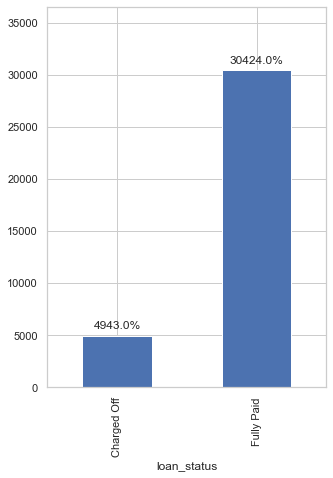

In [99]:
plt.figure(figsize=(5,7))
ax = fin_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

Approximately 14% of loans are defaulted Any variable that increases percentage of default to higher than 16.5% should be considered a business risk.


In [100]:
print("%.2f" % (fin_loan.loc[fin_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(fin_loan)))

13.98


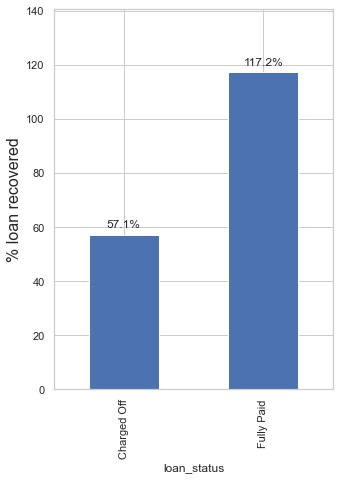

In [102]:
plt.figure(figsize=(5,7))
ax = (fin_loan.groupby('loan_status').total_pymnt.sum() * 100 / fin_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

57% of the loan amount when loans are defaulted.

17 % profit is made by loan provider 

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


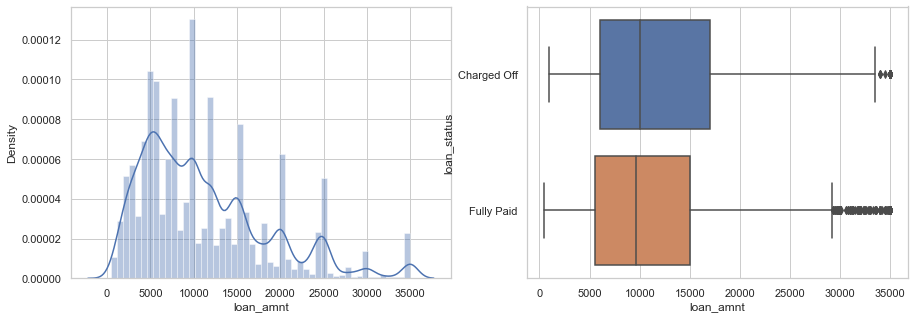

In [103]:
plot_distribution(fin_loan, 'loan_amnt')

In [105]:
fin_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


Creating Derived categorical variable

In [111]:
fin_loan['loan_amnt_bin'] = pd.cut(fin_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


<AxesSubplot:xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

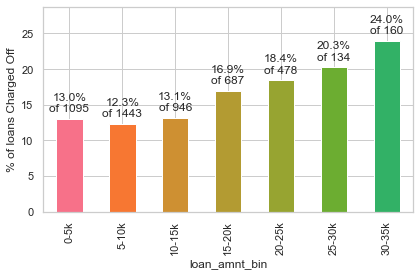

In [112]:
plotLoanStatus(fin_loan, 'loan_amnt_bin')

Percentage of charged off loans increases substantially as the loan amount increases . 
Higher loan  has a risk of defaulters 


In [113]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

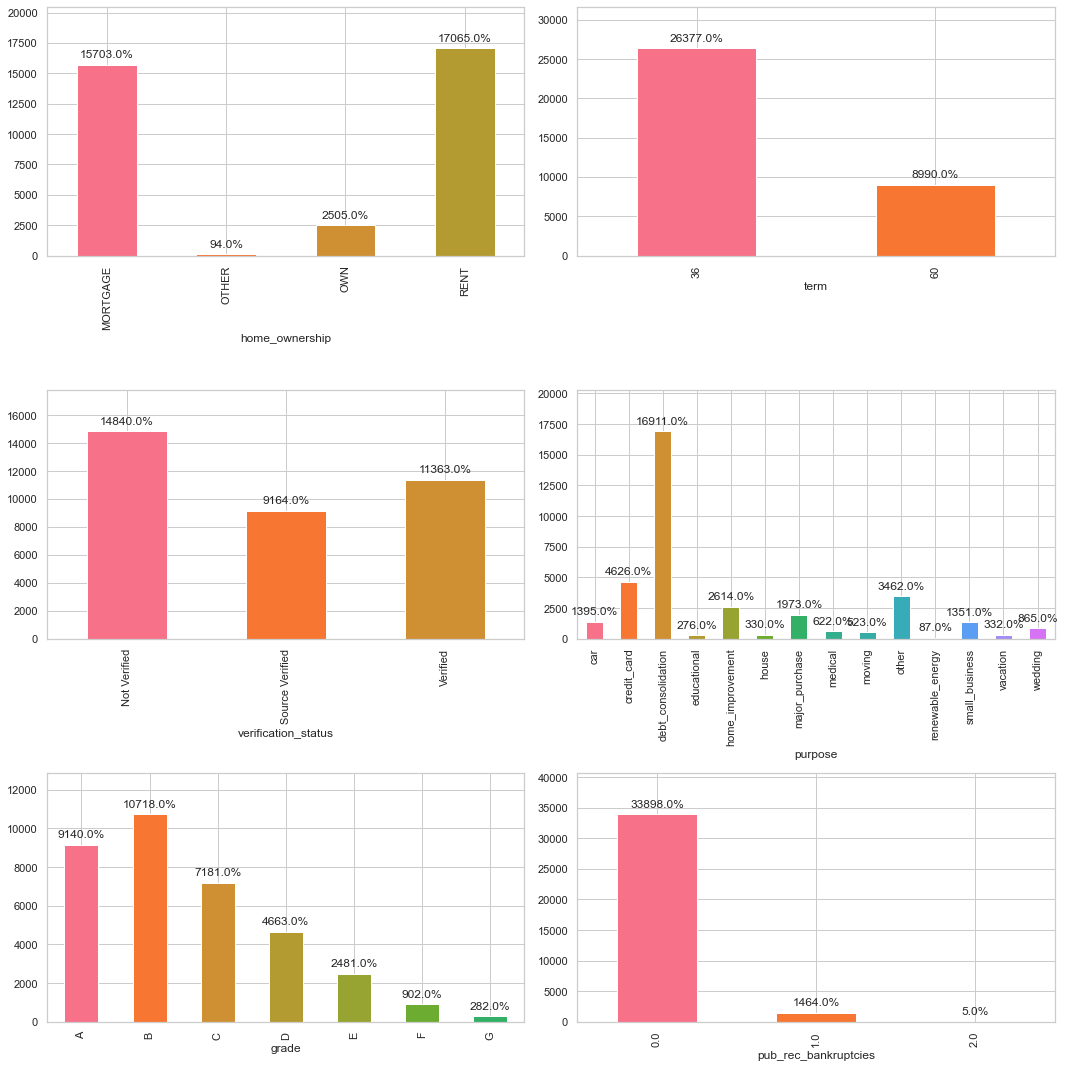

In [114]:
plt.figure(figsize=(15,15))

categoricalBarPlots(fin_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

 Most loans are for 36 month term 
* Very few loans are extended to people with prior record of bankruptcy
* debt_consolidation is by far the largest 'purpose' for seeking a loan 
* Most approved loans are high grade
* <mark> We should investigate the **frequencies of defaults** by term, purpose and prior record of bankruptcy </mark

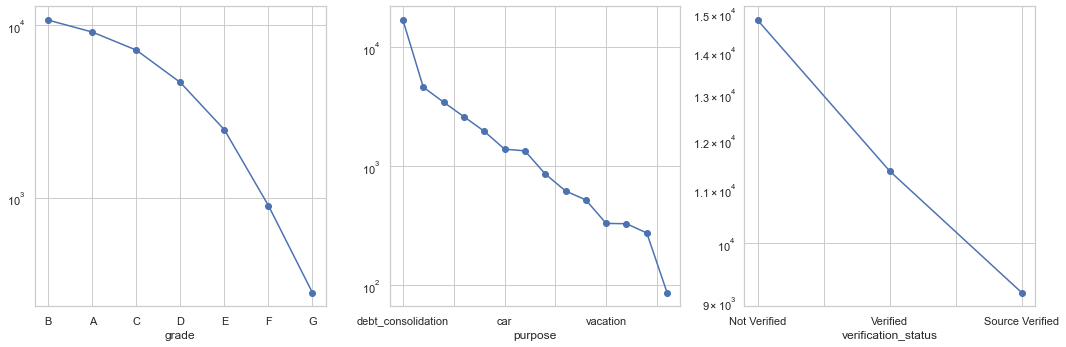

In [117]:
#Let's see if some of these variables follow the famous power law.
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
fin_loan.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
fin_loan.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
fin_loan.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

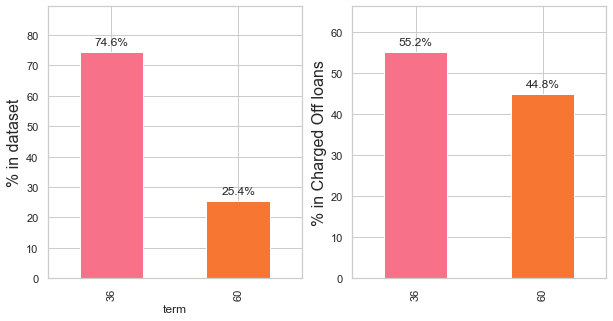

In [126]:
plt.figure(figsize=(10,5))
plot_percentages(fin_loan, 'term')

Approx 75% of the total loans are given for duration of 3 years and other 25% of the loans are those given for 5 years.
 the charged off for term 1 year  is 45%  so rthe higher tensure of loan lesser chance of charged off 
 

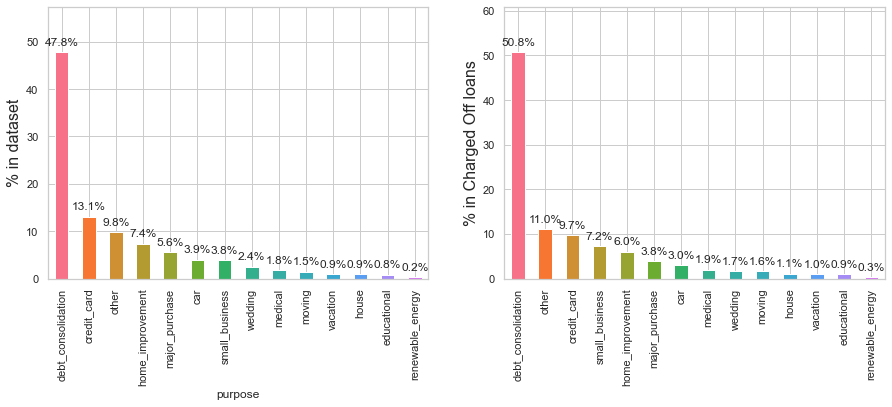

In [127]:
plt.figure(figsize=(15,5))
plot_percentages(fin_loan, 'purpose')

<AxesSubplot:xlabel='purpose', ylabel='% of loans Charged Off'>

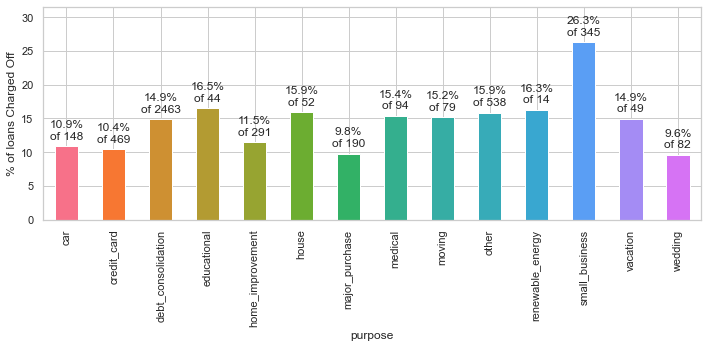

In [207]:
plt.figure(figsize=(10, 5))
plotLoanStatus(fin_loan, 'purpose')


 The loans for small business almost 26% are charged off and become risky 

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

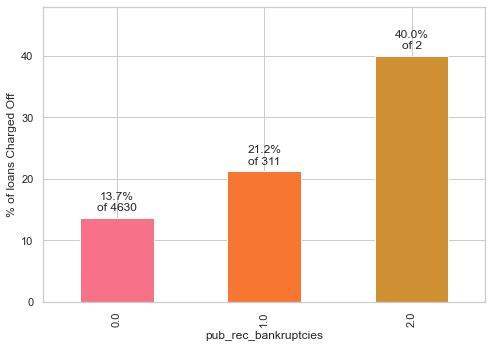

In [129]:
plt.figure(figsize=(7,5))
plotLoanStatus(fin_loan, 'pub_rec_bankruptcies')

 charged off loans increases when the applicant has prior bankruptcy 

In [130]:
fin_loan.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

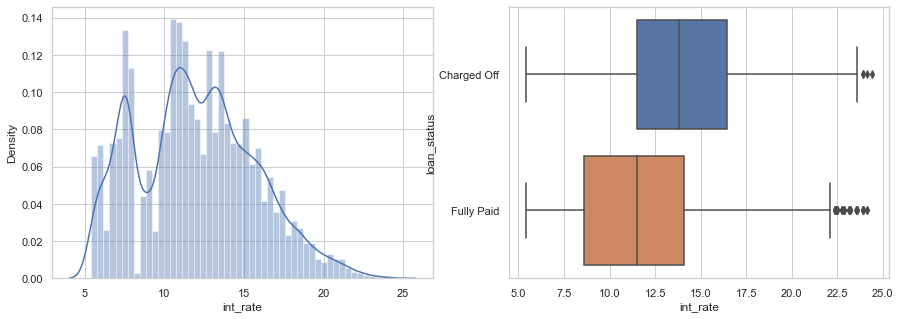

In [131]:
plt.figure(figsize=(15,5))
plot_distribution(fin_loan, 'int_rate')

In [132]:
fin_loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


In [133]:
fin_loan['interest_rate_buckets'] = round(fin_loan['int_rate'])

<AxesSubplot:xlabel='interest_rate_buckets', ylabel='% of loans Charged Off'>

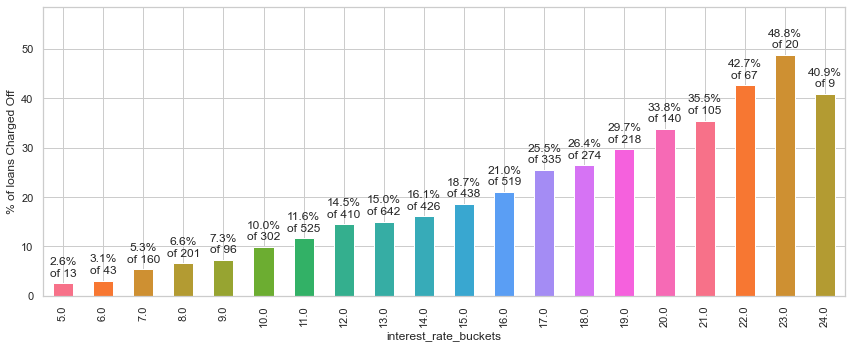

In [134]:
plt.figure(figsize=(12,5))
plotLoanStatus(fin_loan, 'interest_rate_buckets')

In [135]:
fin_loan.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

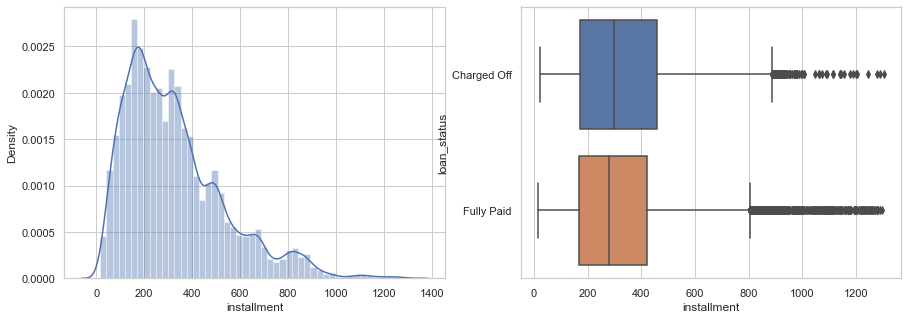

In [136]:
plt.figure(figsize=(15,5))
plot_distribution(fin_loan, 'installment')

In [137]:
fin_loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


In [138]:
fin_loan.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


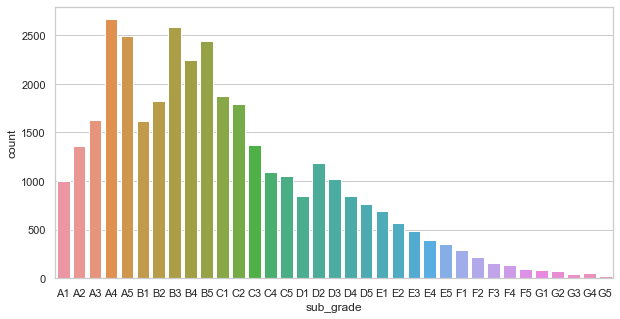

In [140]:
plt.figure(figsize=(10,5))
sns.countplot(fin_loan['sub_grade'], order=sorted(fin_loan.sub_grade.unique()))
plt.show()

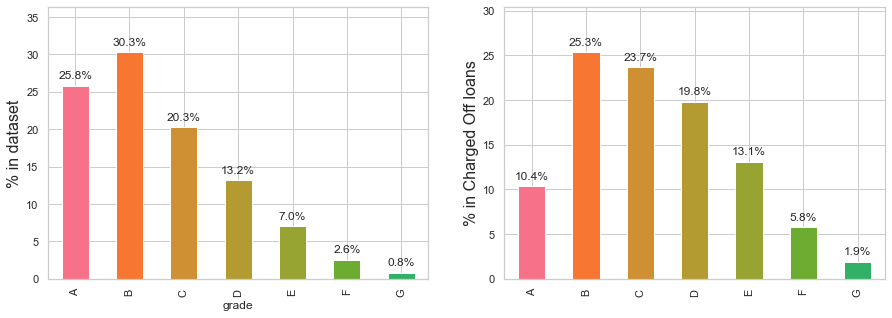

In [141]:
plt.figure(figsize=(15,5))
plot_percentages(fin_loan, 'grade', True)

<AxesSubplot:xlabel='grade', ylabel='% of loans Charged Off'>

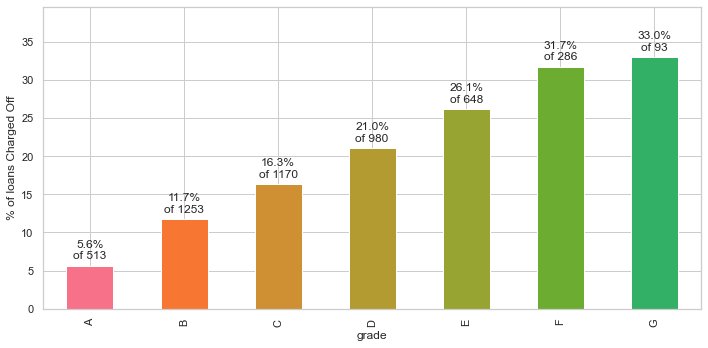

In [142]:
plt.figure(figsize=(10,5))
plotLoanStatus(fin_loan, 'grade')

<AxesSubplot:title={'center':'int_rate'}, xlabel='grade'>

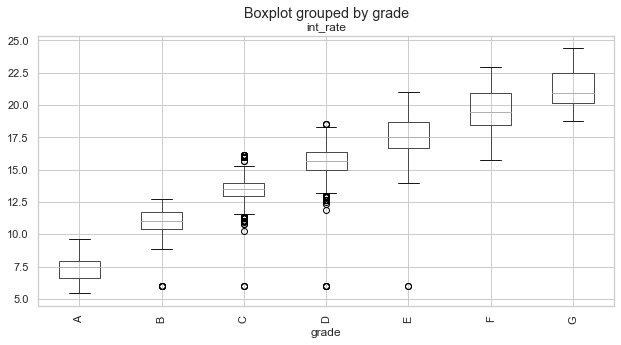

In [143]:
fig, ax = plt.subplots(figsize=(10,5))
fin_loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

In [144]:
top10_emp_title = fin_loan.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

US Army              128
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
UPS                   51
USAF                  51
US Air Force          50
Walmart               44
Name: emp_title, dtype: int64

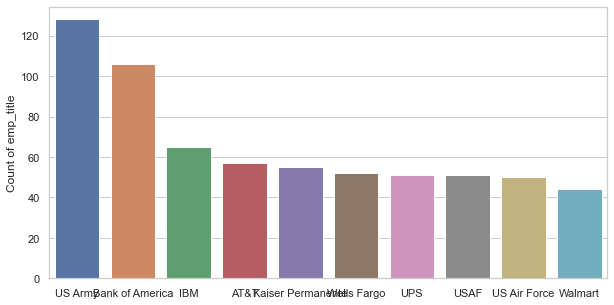

In [145]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

<AxesSubplot:xlabel='emp_title', ylabel='% of loans Charged Off'>

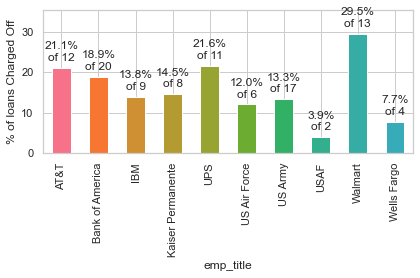

In [146]:
plotLoanStatus(fin_loan[fin_loan['emp_title'].isin(top10_emp_title.index.values)], 'emp_title')

In [147]:
fin_loan.emp_length.value_counts(normalize=True)

10    0.226991
2     0.115447
0     0.112478
3     0.108378
4     0.090649
5     0.086041
1     0.083666
6     0.058303
7     0.046314
8     0.038482
9     0.033251
Name: emp_length, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


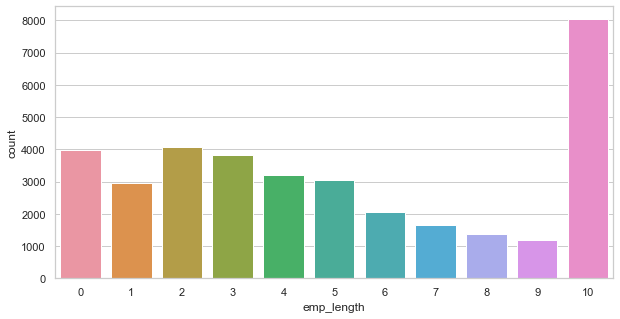

In [149]:
plt.figure(figsize=(10,5))
sns.countplot(fin_loan['emp_length'], order=sorted(fin_loan.emp_length.unique()))
plt.show()

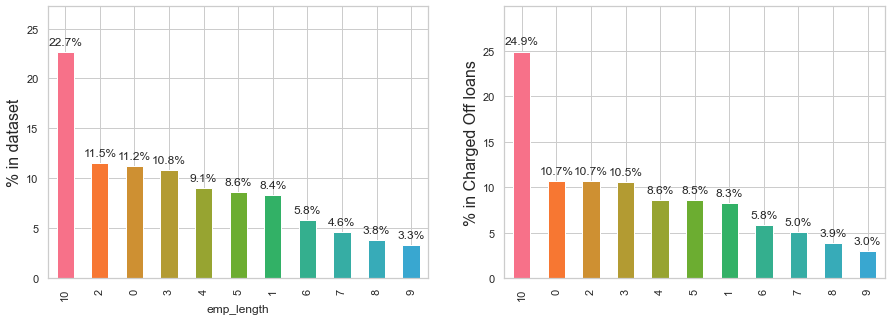

In [150]:
plt.figure(figsize=(15, 5))
plot_percentages(fin_loan, 'emp_length')

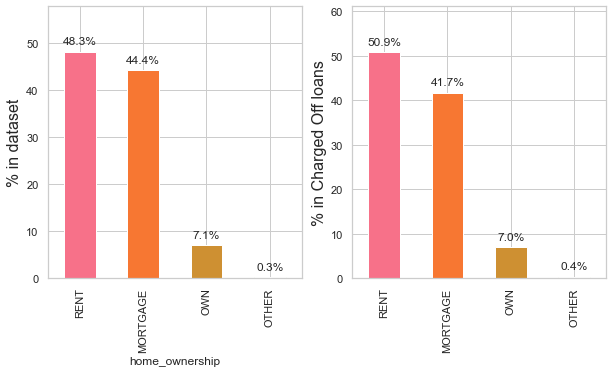

In [151]:
plt.figure(figsize=(10,5))
plot_percentages(fin_loan, 'home_ownership')

In [152]:
fin_loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

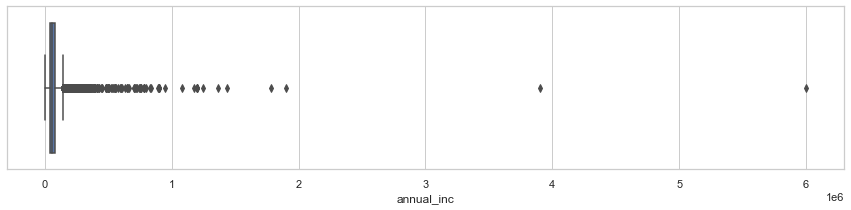

In [159]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=fin_loan['annual_inc'], data=fin_loan)

In [160]:
df = fin_loan[np.abs(fin_loan.annual_inc-fin_loan.annual_inc.mean()) <= (3*fin_loan.annual_inc.std())]

In [161]:
df.annual_inc.describe()

count     35122.000000
mean      66255.515193
std       35749.840874
min        4000.000000
25%       41004.000000
50%       59449.000000
75%       81969.000000
max      260000.000000
Name: annual_inc, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


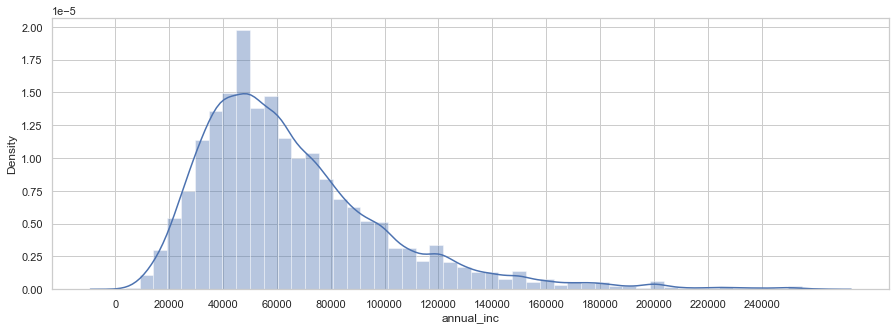

In [163]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [164]:

fin_loan['income_bin'] = fin_loan['annual_inc']/20000
fin_loan['income_bin'] = fin_loan['income_bin'].astype(int)


[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

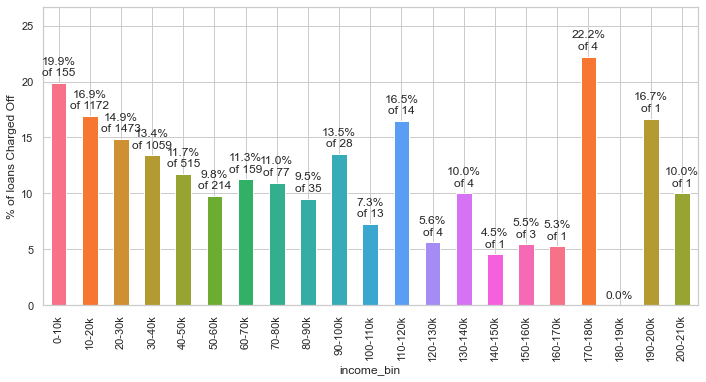

In [165]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(fin_loan.loc[fin_loan['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

when the income increases reduces the loan defulters thats loan dafaulters are observed with low income , 


An case for Bivariate  analysis 

In [166]:
fin_loan.verification_status.value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

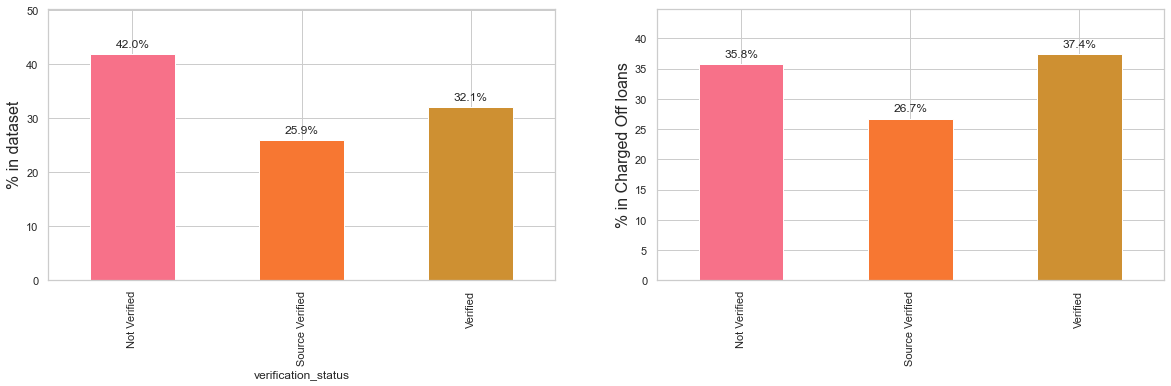

In [167]:
plt.figure(figsize=(20,5))
plot_percentages(fin_loan, 'verification_status', True)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


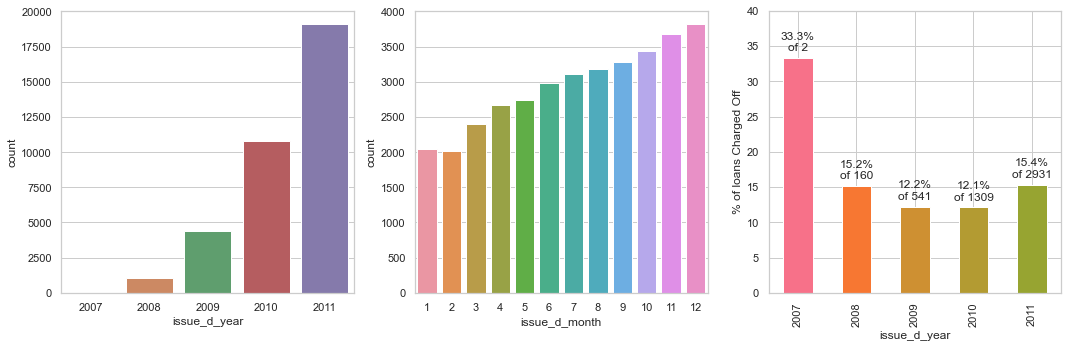

In [169]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(fin_loan['issue_d_year'], order=sorted(fin_loan.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(fin_loan['issue_d_month'], order=sorted(fin_loan.issue_d_month.unique()))


plt.subplot(1, 3, 3)
plotLoanStatus(fin_loan, 'issue_d_year')

plt.show()

<AxesSubplot:xlabel='issue_d_month', ylabel='% of loans Charged Off'>

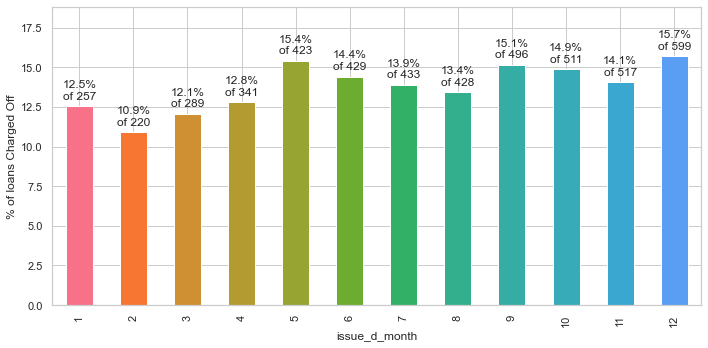

In [170]:
plt.figure(figsize=(10, 5))
plotLoanStatus(fin_loan, 'issue_d_month')

In [171]:
fin_loan.title.describe()

count                  35367
unique                 17662
top       Debt Consolidation
freq                    1975
Name: title, dtype: object

In [172]:
fin_loan.title.value_counts().head(10)

Debt Consolidation           1975
Debt Consolidation Loan      1541
Personal Loan                 589
Consolidation                 462
debt consolidation            440
Credit Card Consolidation     325
Home Improvement              324
Debt consolidation            303
Personal                      281
Credit Card Loan              280
Name: title, dtype: int64

In [173]:
fin_loan = fin_loan.drop('title',axis =1 )

In [174]:
fin_loan.addr_state.value_counts(normalize=True).head(10)

CA    0.180847
NY    0.095739
FL    0.071677
TX    0.069358
NJ    0.047134
IL    0.039048
PA    0.038822
VA    0.035626
GA    0.035429
MA    0.033393
Name: addr_state, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


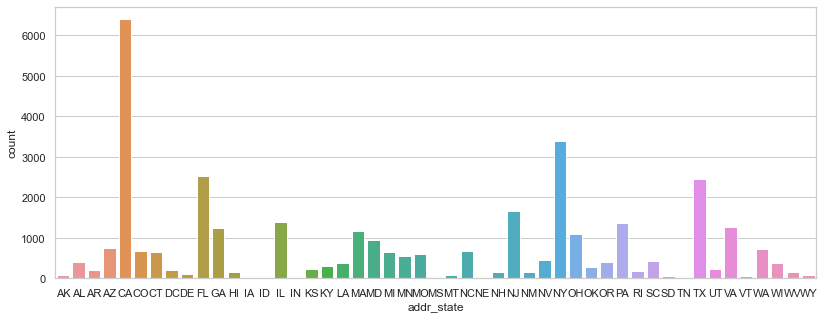

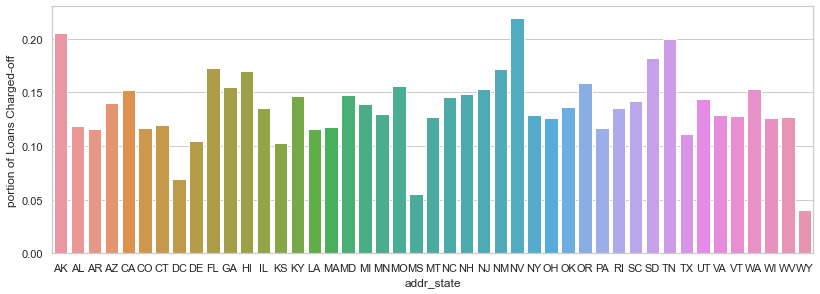

In [175]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(fin_loan['addr_state'], order=sorted(fin_loan.addr_state.unique()))

charge_off_count = fin_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = fin_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
plt.show()

In [177]:
fin_loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x360 with 0 Axes>

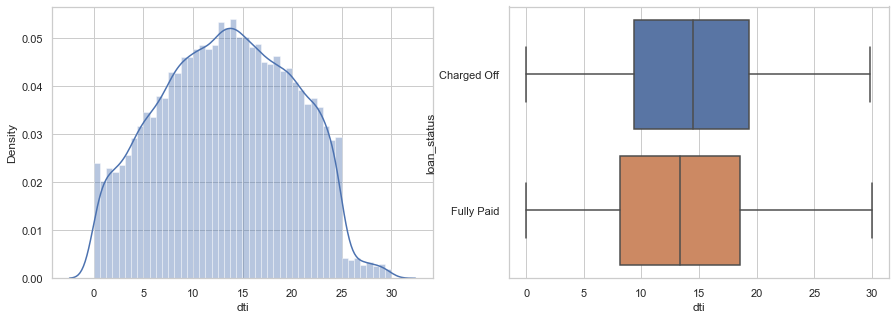

In [178]:
plt.figure(figsize=(10,5))

plot_distribution(fin_loan, 'dti')

In [179]:
#  derived variable 
fin_loan['dti_bin'] = pd.cut(fin_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


<AxesSubplot:xlabel='dti_bin', ylabel='% of loans Charged Off'>

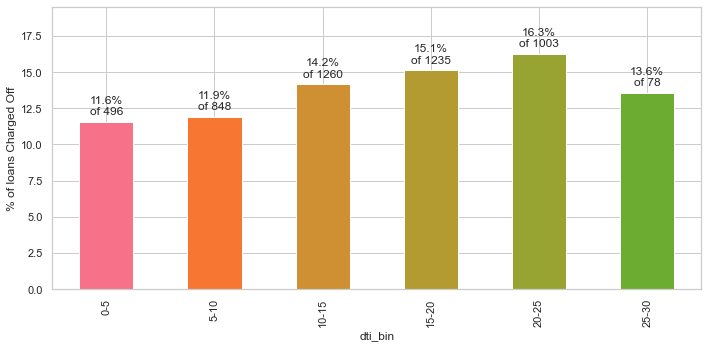

In [180]:
plt.figure(figsize=(10,5))
plotLoanStatus(fin_loan, 'dti_bin')

In [181]:
fin_loan.delinq_2yrs.value_counts(normalize=True)

0     0.891594
1     0.083100
2     0.017361
3     0.005344
4     0.001499
5     0.000594
6     0.000283
7     0.000113
8     0.000057
9     0.000028
11    0.000028
Name: delinq_2yrs, dtype: float64

<AxesSubplot:xlabel='delinq_2yrs', ylabel='% of loans Charged Off'>

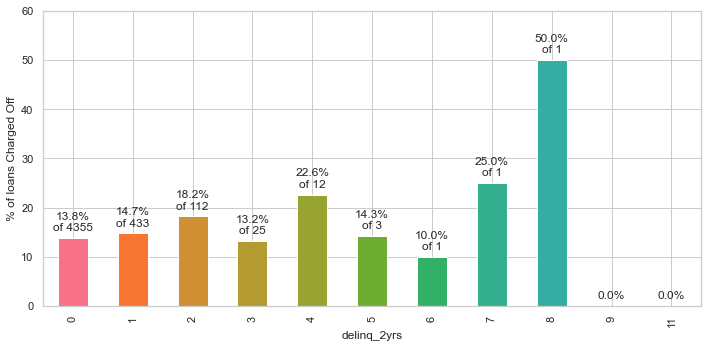

In [182]:
plt.figure(figsize=(10,5))
plotLoanStatus(fin_loan, 'delinq_2yrs')

In [183]:
fin_loan.earliest_cr_line_year.value_counts(normalize=True).head()

2000    0.083326
1999    0.076201
1998    0.072638
2001    0.065259
1997    0.062403
Name: earliest_cr_line_year, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


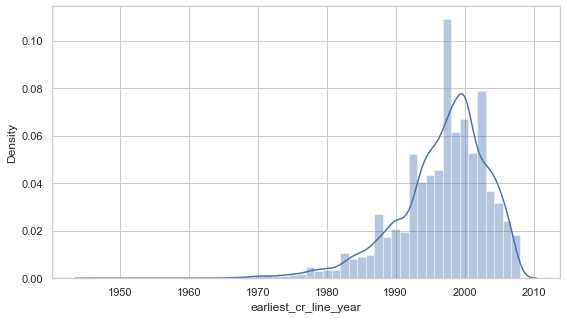

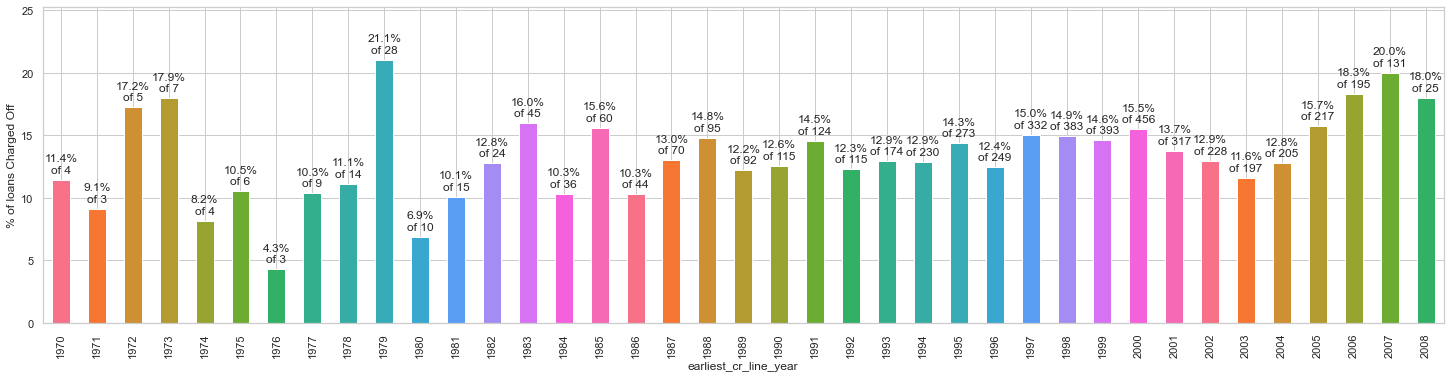

In [185]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

sns.distplot(fin_loan['earliest_cr_line_year'])


plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(fin_loan.loc[fin_loan['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()


In [186]:
fin_loan.inq_last_6mths.value_counts(normalize=True)

0    0.485848
1    0.276359
2    0.147256
3    0.076427
4    0.007917
5    0.003478
6    0.001527
7    0.000877
8    0.000311
Name: inq_last_6mths, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


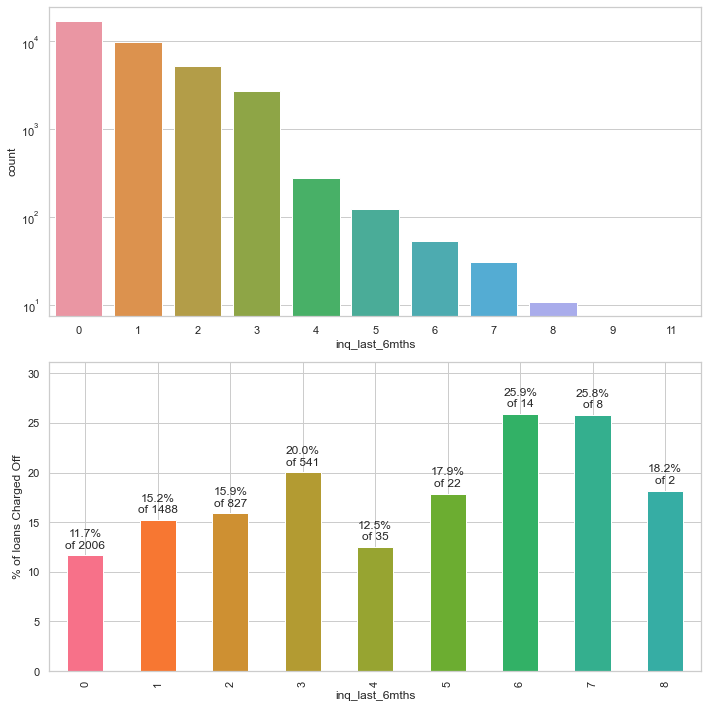

In [187]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(fin_loan['inq_last_6mths'], order=sorted(fin_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(fin_loan, 'inq_last_6mths')
plt.show()

In [188]:
fin_loan.open_acc.describe()

count    35367.000000
mean         9.332004
std          4.374975
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

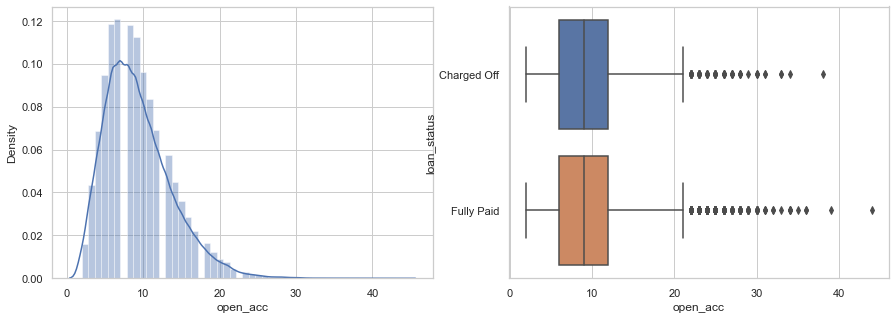

In [189]:
plt.figure(figsize=(15,5))
plot_distribution(fin_loan, 'open_acc')
plt.show()

In [190]:
fin_loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,9.308517,4.491786,2.0,6.0,9.0,12.0,38.0
Fully Paid,30424.0,9.335820,4.355764,2.0,6.0,9.0,12.0,44.0


In [191]:
fin_loan.pub_rec.value_counts(normalize=True)

0    0.947663
1    0.050838
2    0.001244
3    0.000198
4    0.000057
Name: pub_rec, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


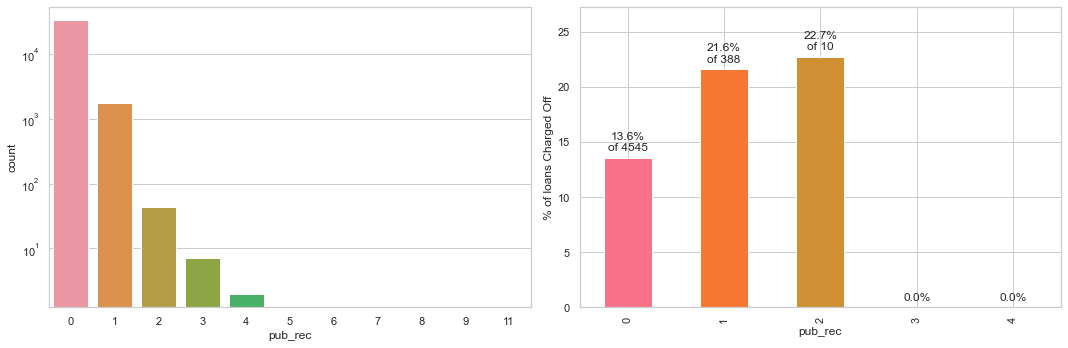

In [194]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(fin_loan['pub_rec'], order=sorted(fin_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(fin_loan, 'pub_rec')
plt.show()



In [195]:
fin_loan.revol_bal.describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

In [196]:
fin_loan = fin_loan[np.abs(fin_loan.revol_bal-fin_loan.revol_bal.mean()) <= (3*fin_loan.revol_bal.std())]

In [200]:
fin_loan.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4858.0,12453.837382,11330.139812,0.0,4161.0,9336.5,17212.5,60071.0
Fully Paid,29739.0,11641.208884,10974.614732,0.0,3612.0,8581.0,16138.5,60376.0


In [201]:
fin_loan.revol_util.describe()

count    34597.000000
mean        48.904609
std         28.210493
min          0.000000
25%         25.600000
50%         49.400000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

<AxesSubplot:title={'center':'revol_util'}, xlabel='loan_status'>

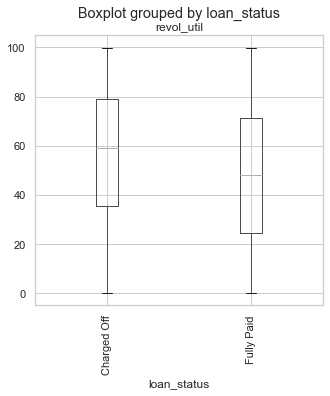

In [202]:
fig, ax = plt.subplots(figsize=(5,5))
df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

Conclusion 
When the income increases reduces the loan defaulters .And  loan defaulters are observed with low income , 
Charged off loans increases when the applicant has prior bankruptcy 
The loans for small business almost 26% are charged off and become risky 
Approx 75% of the total loans are given for duration of 3 years and other 25% of the loans are those given for 5 years. The charged off for term 1 year  is 45%  so the higher tenure of loan lesser chance of charged off 
Percentage of charged off loans increases substantially as the loan amount increases . 
Higher loan  has a risk of defaulters 

